# Political Violence Targeting Women & Demonstrations Featuring Women

#### All violence targeting women, as well as demonstrations featuring women, are included in the data file below. The data in this file cover all events in which women were specifically targeted by political violence, not all events involving women in any way; the file also covers all demonstration events in which women were specifically featured, not all demonstrations involving women. 

#### This dataset was extract from ACLED Access Portal and we perform EDA using Python.


### Data Collection & Data Exploration

We import pandas and necessary libraries for dataframe manipulation and analysis.

In [2]:
# Libraries are imported
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Dataset is downloaded
df_gpv = pd.read_csv("gender_Sep27-1.csv")
df_gpv.drop([
    #'event_id_cnty', 
    #'event_date', 
    #'year', 
    'time_precision',
    'disorder_type', 
    #'event_type', 
    #'sub_event_type', 
    #'actor1',
    'assoc_actor_1', 
    #'inter1', 
    #'actor2', 
    #'assoc_actor_2', 
    #'inter2',
    #'interaction', 
    'civilian_targeting', 
    #'iso', 
    #'region', 
    #'country',
    'admin1', 
    'admin2', 
    'admin3', 
    #'location', 
    'latitude', 
    'longitude',
    'geo_precision', 
    #'source', 
    'source_scale', 
    #'notes', 
    #'fatalities',
    'tags',
    #'timestamp' it is relevant?                           
], axis=1, inplace=True)
display(df_gpv.shape)

(75563, 19)

In [11]:
# First rows are checked
display(df_gpv.head())


,event_id_cnty,event_date,year,disorder_type,event_type,sub_event_type,actor1,inter1,actor2,assoc_actor_2,...,civilian_targeting,iso,region,country,admin3,location,source,notes,fatalities,timestamp
0,BRA85924,2024-09-27,2024,Political violence,Violence against civilians,Sexual violence,Unidentified Gang (Brazil),Political militia,Civilians (Brazil),Women (Brazil),...,Civilian targeting,76,South America,Brazil,NaN,Sorriso,Gazeta Digital,"On 27 September 2024, in Sorriso (Mato Grosso)...",0,1727730463
1,ECU3988,2024-09-27,2024,Political violence,Violence against civilians,Attack,Unidentified Armed Group (Ecuador),Political militia,Civilians (Ecuador),Government of Ecuador (2023-); Women (Ecuador),...,Civilian targeting,218,South America,Ecuador,NaN,Guayaquil,Ecuavisa; El Universo (Ecuador),"Around 27 September 2024 (as reported), in Gua...",1,1727730464
2,MEX93498,2024-09-27,2024,Political violence,Violence against civilians,Abduction/forced disappearance,Unidentified Gang (Mexico),Political militia,Civilians (United States),Women (United States),...,Civilian targeting,484,North America,Mexico,NaN,Tijuana,AFN - Tijuana,"Around 27 September 2024 (as reported), in Tij...",0,1727730464
3,MEX93502,2024-09-27,2024,Political violence,Violence against civilians,Attack,Unidentified Gang (Mexico),Political militia,Civilians (Mexico),Labor Group (Mexico); Women (Mexico),...,Civilian targeting,484,North America,Mexico,NaN,Ciudad de Mexico - Gustavo A. Madero,Milenio,"On 27 September 2024, in Ciudad de Mexico - Gu...",1,1727730464
4,YEM92022,2024-09-27,2024,Political violence,Violence against civilians,Attack,Police Forces of Yemen (2017-) Houthi,State forces,Civilians (Yemen),Students (Yemen); Women (Yemen),...,Civilian targeting,887,Middle East,Yemen,NaN,Al Yahari,Khabar News Agency (Yemen),"On 27 September 2024, a Houthi-affiliated fema...",0,1727730471


In [12]:
# Last five rows are checking

display(df_gpv.tail())

,event_id_cnty,event_date,year,disorder_type,event_type,sub_event_type,actor1,inter1,actor2,assoc_actor_2,...,civilian_targeting,iso,region,country,admin3,location,source,notes,fatalities,timestamp
75558,UGA13,1997-03-05,1997,Political violence,Violence against civilians,Attack,LRA: Lords Resistance Army,Rebel group,Civilians (Uganda),Women (Uganda),...,Civilian targeting,800,Eastern Africa,Uganda,Palabek Kal,Palabek,New York Times,After failing to find deserters they captured ...,9,1667868656
75559,ALG50,1997-02-24,1997,Political violence,Violence against civilians,Attack,GIA: Armed Islamic Group,Rebel group,Civilians (Algeria),Women (Algeria),...,Civilian targeting,12,Northern Africa,Algeria,NaN,Berrouaghia,Algeria Watch,24 March: 5 young girls were killed in Berroua...,5,1638981224
75560,SIE4762,1997-01-22,1997,Political violence,Violence against civilians,Sexual violence,RUF: Revolutionary United Front,Rebel group,Civilians (Sierra Leone),Women (Sierra Leone),...,Civilian targeting,694,Western Africa,Sierra Leone,Kholifa Rowalla,Magburaka,AFP,Week of 22 January. RUF forces attacked civili...,40,1638981224
75561,RWA652,1997-01-15,1997,Political violence,Violence against civilians,Attack,Unidentified Armed Group (Rwanda),Political militia,Civilians (Spain),Aid Workers (Spain); Women (Spain); Aid Worker...,...,Civilian targeting,646,Eastern Africa,Rwanda,Cyuve,Ruhengeri,Aid Worker Security Database,"Around 15 January 1997 (month of), 3 spanish a...",3,1633983690
75562,NIR1,1997-01-06,1997,Political violence,Violence against civilians,Attack,Tuareg Ethnic Militia (Niger),Identity militia,Civilians (Niger),Women (Niger),...,Civilian targeting,562,Western Africa,Niger,Niamey III,Niamey,Reuters,A french woman was shot and killed by Tuareg r...,1,1622068223


In [30]:
# columns's names are checked
display(df_gpv.keys())

Index(['event_id_cnty', 'event_date', 'year', 'time_precision',
       'disorder_type', 'event_type', 'sub_event_type', 'actor1',
       'assoc_actor_1', 'inter1', 'actor2', 'assoc_actor_2', 'inter2',
       'interaction', 'civilian_targeting', 'iso', 'region', 'country',
       'admin1', 'admin2', 'admin3', 'location', 'latitude', 'longitude',
       'geo_precision', 'source', 'source_scale', 'notes', 'fatalities',
       'tags', 'timestamp'],
      dtype='object')

In [7]:
# Dataframe is summarized
# 
df_gpv.info()

#investigar si existe diferencia con el metodo .summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75563 entries, 0 to 75562
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   event_id_cnty       75563 non-null  object 
 1   event_date          75563 non-null  object 
 2   year                75563 non-null  int64  
 3   time_precision      75563 non-null  int64  
 4   disorder_type       75563 non-null  object 
 5   event_type          75563 non-null  object 
 6   sub_event_type      75563 non-null  object 
 7   actor1              75563 non-null  object 
 8   assoc_actor_1       55610 non-null  object 
 9   inter1              75563 non-null  object 
 10  actor2              27044 non-null  object 
 11  assoc_actor_2       23892 non-null  object 
 12  inter2              27044 non-null  object 
 13  interaction         75563 non-null  object 
 14  civilian_targeting  21438 non-null  object 
 15  iso                 75563 non-null  int64  
 16  regi

In [8]:
# Basic statistical description (numerical columns)
df_gpv.describe()

,year,time_precision,iso,latitude,longitude,geo_precision,fatalities,timestamp
count,75563.000000,75563.000000,75563.000000,75563.000000,75563.000000,75563.000000,75563.000000,7.556300e+04
mean,2020.765295,1.096489,457.337401,23.442707,12.084752,1.126358,0.255323,1.677659e+09
std,2.888807,0.328811,251.661696,20.843715,72.187548,0.371982,4.010021,3.916375e+07
min,1997.000000,1.000000,0.000000,-54.806200,-171.755300,1.000000,0.000000,1.559160e+09
25%,2020.000000,1.000000,276.000000,13.212700,-65.216900,1.000000,0.000000,1.649692e+09
50%,2021.000000,1.000000,410.000000,26.664500,25.208100,1.000000,0.000000,1.680634e+09
75%,2023.000000,1.000000,710.000000,37.597100,73.685400,1.000000,0.000000,1.713223e+09
max,2024.000000,3.000000,894.000000,72.913600,178.448700,3.000000,750.000000,1.727820e+09


In [9]:
# countries are displaying
df_gpv.iloc[:, 0]

df_gpv['event_id_cnty']


0        BRA85924
1         ECU3988
2        MEX93498
3        MEX93502
4        YEM92022
           ...   
75558       UGA13
75559       ALG50
75560     SIE4762
75561      RWA652
75562        NIR1
Name: event_id_cnty, Length: 75563, dtype: object

### Handling missing data

In [13]:
unique_actors = df_gpv['actor1'].unique()
for i in unique_actors:
    print(i)

Unidentified Gang (Brazil)
Unidentified Armed Group (Ecuador)
Unidentified Gang (Mexico)
Police Forces of Yemen (2017-) Houthi
Protesters (South Africa)
Protesters (Sweden)
Protesters (South Korea)
Protesters (Canada)
Protesters (Pakistan)
Protesters (Sudan)
Rioters (Zimbabwe)
Katsina Communal Militia (Nigeria)
Protesters (Venezuela)
Military Forces of Israel (2022-)
Protesters (Turkey)
EPLC: Awakening of Patriots for the Liberation of Congo (Wazalendo)
M23: March 23 Movement
Protesters (Italy)
Protesters (United States)
Protesters (India)
Unidentified Gang (Guatemala)
Unidentified Armed Group (Brazil)
Rioters (Spain)
Protesters (Taiwan)
Protesters (Afghanistan)
Protesters (Nepal)
Protesters (Belgium)
Protesters (Bangladesh)
Unidentified Armed Group (Mexico)
Protesters (Mexico)
Unidentified Armed Group (Chad)
Rioters (Chile)
Protesters (Slovakia)
Protesters (Spain)
Protesters (Indonesia)
Darfur Communal Militia (Sudan)
Protesters (Brazil)
Unidentified Armed Group (Iraq)
Dahalo Militia


In [11]:
# Missing values are identifying
df_gpv.isnull().sum()

event_id_cnty             0
event_date                0
year                      0
time_precision            0
disorder_type             0
event_type                0
sub_event_type            0
actor1                    0
assoc_actor_1         19953
inter1                    0
actor2                48519
assoc_actor_2         51671
inter2                48519
interaction               0
civilian_targeting    54125
iso                       0
region                    0
country                   0
admin1                    0
admin2                 1807
admin3                46258
location                  0
latitude                  0
longitude                 0
geo_precision             0
source                    0
source_scale              0
notes                     0
fatalities                0
tags                  18799
timestamp                 0
dtype: int64

In [16]:
#Missing values are dropped

df_gpv.dropna(subset=['assoc_actor_1']).isnull().sum()


event_id_cnty             0
event_date                0
year                      0
time_precision            0
disorder_type             0
event_type                0
sub_event_type            0
actor1                    0
assoc_actor_1             0
inter1                    0
actor2                48519
assoc_actor_2         51671
inter2                48519
interaction               0
civilian_targeting    52737
iso                       0
region                    0
country                   0
admin1                    0
admin2                 1219
admin3                34779
location                  0
latitude                  0
longitude                 0
geo_precision             0
source                    0
source_scale              0
notes                     0
fatalities                0
tags                   4696
timestamp                 0
dtype: int64

In [17]:
# Handling duplicates if exists
df_gpv.drop_duplicates()

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp
0,BRA85924,2024-09-27,2024,1,Political violence,Violence against civilians,Sexual violence,Unidentified Gang (Brazil),NaN,Political militia,...,Sorriso,-12.5453,-55.7114,1,Gazeta Digital,Subnational,"On 27 September 2024, in Sorriso (Mato Grosso)...",0,NaN,1727730463
1,ECU3988,2024-09-27,2024,2,Political violence,Violence against civilians,Attack,Unidentified Armed Group (Ecuador),NaN,Political militia,...,Guayaquil,-2.1962,-79.8862,1,Ecuavisa; El Universo (Ecuador),National,"Around 27 September 2024 (as reported), in Gua...",1,women targeted: government officials,1727730464
2,MEX93498,2024-09-27,2024,2,Political violence,Violence against civilians,Abduction/forced disappearance,Unidentified Gang (Mexico),NaN,Political militia,...,Tijuana,32.5325,-117.0190,1,AFN - Tijuana,Subnational,"Around 27 September 2024 (as reported), in Tij...",0,NaN,1727730464
3,MEX93502,2024-09-27,2024,1,Political violence,Violence against civilians,Attack,Unidentified Gang (Mexico),NaN,Political militia,...,Ciudad de Mexico - Gustavo A. Madero,19.4829,-99.1135,1,Milenio,National,"On 27 September 2024, in Ciudad de Mexico - Gu...",1,NaN,1727730464
4,YEM92022,2024-09-27,2024,1,Political violence,Violence against civilians,Attack,Police Forces of Yemen (2017-) Houthi,Teachers (Yemen),State forces,...,Al Yahari,13.9966,44.0604,1,Khabar News Agency (Yemen),National,"On 27 September 2024, a Houthi-affiliated fema...",0,NaN,1727730471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75558,UGA13,1997-03-05,1997,2,Political violence,Violence against civilians,Attack,LRA: Lords Resistance Army,NaN,Rebel group,...,Palabek,3.4333,32.5667,1,New York Times,International,After failing to find deserters they captured ...,9,women targeted: girls,1667868656
75559,ALG50,1997-02-24,1997,1,Political violence,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,Rebel group,...,Berrouaghia,36.1352,2.9109,1,Algeria Watch,Other,24 March: 5 young girls were killed in Berroua...,5,women targeted: girls,1638981224
75560,SIE4762,1997-01-22,1997,2,Political violence,Violence against civilians,Sexual violence,RUF: Revolutionary United Front,NaN,Rebel group,...,Magburaka,8.7167,-11.9500,2,AFP,International,Week of 22 January. RUF forces attacked civili...,40,women targeted: girls,1638981224
75561,RWA652,1997-01-15,1997,3,Political violence,Violence against civilians,Attack,Unidentified Armed Group (Rwanda),NaN,Political militia,...,Ruhengeri,-1.4998,29.6350,1,Aid Worker Security Database,Local partner-Other,"Around 15 January 1997 (month of), 3 spanish a...",3,NaN,1633983690


### Understanding data distribution

In [27]:
df_gpv[df_gpv['fatalities']== 750].iloc[0]['notes']

'On 18 August 2011, Murle militia attacked the town of Pieri (Uror county, Jonglei state), killing at least 750 Lou Nuer residents. Nearly 1,000 were wounded, and dozens of women as well as children were abducted. 38,000 head of cattle were allegedly stolen.'

In [21]:
df_gpv['fatalities'].value_counts()

fatalities
0      65401
1       8260
2        998
3        390
4        140
5         78
7         47
6         46
10        44
8         21
9         19
12        15
11        13
15        13
20         6
19         5
17         4
14         4
16         4
40         4
23         3
100        3
30         3
32         2
50         2
200        2
350        2
18         2
22         2
67         2
13         2
24         2
72         2
46         2
71         2
63         1
76         1
29         1
37         1
42         1
33         1
28         1
103        1
130        1
25         1
348        1
35         1
31         1
36         1
750        1
60         1
157        1
80         1
Name: count, dtype: int64

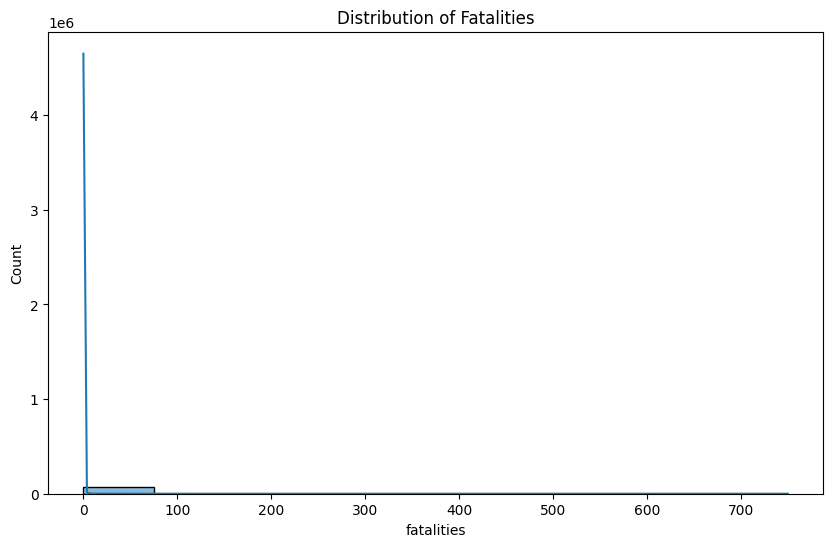

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df_gpv['fatalities'], bins=10, kde=True)
plt.title('Distribution of Fatalities')
plt.show()

#change to barplot

### Analyzing relationships


##### Scatterplot

In [29]:

len(df_gpv['event_id_cnty'].unique())


75563

In [6]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_gpv, x='event_id_cnty', y='sub_event_type')
plt.title('Scatter Plot of event_id_cnty vs sub_event_type')
plt.show()
# probar con barplot/hacer el plot por país

ValueError: Could not interpret value `event_id_cnty` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

- Iteras por cada fila en la columna de "actor1".
- Por cada string, si es distinto de NaN, te fijás que TODAS tengan la forma: "xxxxx (pais)".
- Si es así, entonces, vas de derecha a izquierda en ese string, la primera vez que aparece el "(", borrás todo el string desde ese punto a la derecha y que te quede "xxxxx " (ojo el espacio del final).
- Al string resultante le haces un .strip() para sacar espacios varios al principio y final.
- Y el resultado lo creas en una nueva columna llamada "actor1_formatted".

In [15]:
#actor1_formatted = []

#def my_custom_fn(value):
   # for value in df_gpv["actor1"]:
    # `value` en este caso, toma el valor de cada fila en la columna del apply
    #    if df_gpv["actor1"] != "NaN":
   #         return actor1_formatted.append(value)

#df_gpv["actor1_formatted"] = df_gpv["actor1"].apply(my_custom_fn)


actor1_formatted = []

def my_custom_fn(value):
    #suggestion '.notna'...is it right?
    if pd.notna(value):    
        actor1_formatted.append(value)

    return value  


df_gpv["actor1_formatted"] = df_gpv["actor1"].apply(my_custom_fn)

display(actor1_formatted)


['Unidentified Gang (Brazil)',
 'Unidentified Armed Group (Ecuador)',
 'Unidentified Gang (Mexico)',
 'Unidentified Gang (Mexico)',
 'Police Forces of Yemen (2017-) Houthi',
 'Protesters (South Africa)',
 'Protesters (Sweden)',
 'Protesters (Sweden)',
 'Protesters (South Korea)',
 'Protesters (Canada)',
 'Protesters (Canada)',
 'Protesters (Pakistan)',
 'Protesters (Sudan)',
 'Rioters (Zimbabwe)',
 'Katsina Communal Militia (Nigeria)',
 'Protesters (Venezuela)',
 'Unidentified Gang (Mexico)',
 'Military Forces of Israel (2022-)',
 'Protesters (Turkey)',
 'EPLC: Awakening of Patriots for the Liberation of Congo (Wazalendo)',
 'M23: March 23 Movement',
 'M23: March 23 Movement',
 'Protesters (Italy)',
 'Protesters (South Korea)',
 'Protesters (South Korea)',
 'Protesters (South Korea)',
 'Protesters (United States)',
 'Protesters (United States)',
 'Protesters (United States)',
 'Protesters (Pakistan)',
 'Protesters (India)',
 'Unidentified Gang (Guatemala)',
 'Unidentified Armed Group (